In [1]:
%env CUDA_VISIBLE_DEVICES=-1
import os
import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'patch.edgecolor': 'white',
    'axes.edgecolor': 'black',
    'savefig.edgecolor': 'white',
    'savefig.facecolor': 'white',
})
plt.rcParams['axes.linewidth'] = .55

env: CUDA_VISIBLE_DEVICES=-1


In [2]:
from collections import defaultdict
df_ls = []
data_ssim = defaultdict(int)
data_dice = defaultdict(int)

for root, dir, files in os.walk("./logs/kfold"):
    if 'val.csv' in files:
        # _, _, _, _, dataset, method, suffix, _, fold = root.split('/')
        _, _, _, dataset, model, method, suffix, _, fold = root.split('/')
        fold = int(fold[0])
        acceleration, _, mode, target = suffix.split('_')
        acceleration = int(acceleration[1:])
        # print(dataset, method, fold, acceleration, mode, target)
        df = pd.read_csv(os.path.join(root, 'val.csv'), sep='\t')
        data_ssim[f'{dataset}_{method}_{mode}_{target}_{acceleration}_{fold}'] = -df.ssim.mean()
        data_dice[f'{dataset}_{method}_{mode}_{target}_{acceleration}_{fold}'] = np.concatenate((df.dice_vec_0, df.dice_vec_1, df.dice_vec_2)).mean()
for key in data_ssim.keys():
    dataset, method, mode, target, acceleration, fold = key.split('_')
    acceleration = int(acceleration)
    df = pd.DataFrame.from_dict(dict(dice=[data_dice[key]], ssim=[data_ssim[key]]))
    df['dataset'] = dataset
    df['fold'] = fold
    # df['method'] = method
    if method == 'igs':
        df['method'] = 'Ours'
    elif method == 'loupe':
        df['method'] = 'LOUPE'
    elif method == 'center':
        df['method'] = 'Center'
    elif method == 'equispaced':
        df['method'] = 'Equispaced'
    df['mode'] = mode
    df['target'] = target
    df['acceleration'] = acceleration
    df_ls.append(df)
df = pd.concat(df_ls).reset_index()

In [3]:
df.columns = ['index', 'Dice', 'SSIM', 'dataset', 'fold', r'$\bf{method}$', 'mode', 'target', r'$\bf{acceleration}$']
df.head()

,index,Dice,SSIM,dataset,fold,$\bf{method}$,mode,target,$\bf{acceleration}$
0,0,0.815449,0.899584,acdc,0,LOUPE,1d,dice,4
1,0,0.740436,0.885963,acdc,1,LOUPE,1d,dice,4
2,0,0.809528,0.918474,acdc,4,LOUPE,1d,dice,4
3,0,0.820629,0.897053,acdc,3,LOUPE,1d,dice,4
4,0,0.744444,0.900156,acdc,2,LOUPE,1d,dice,4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


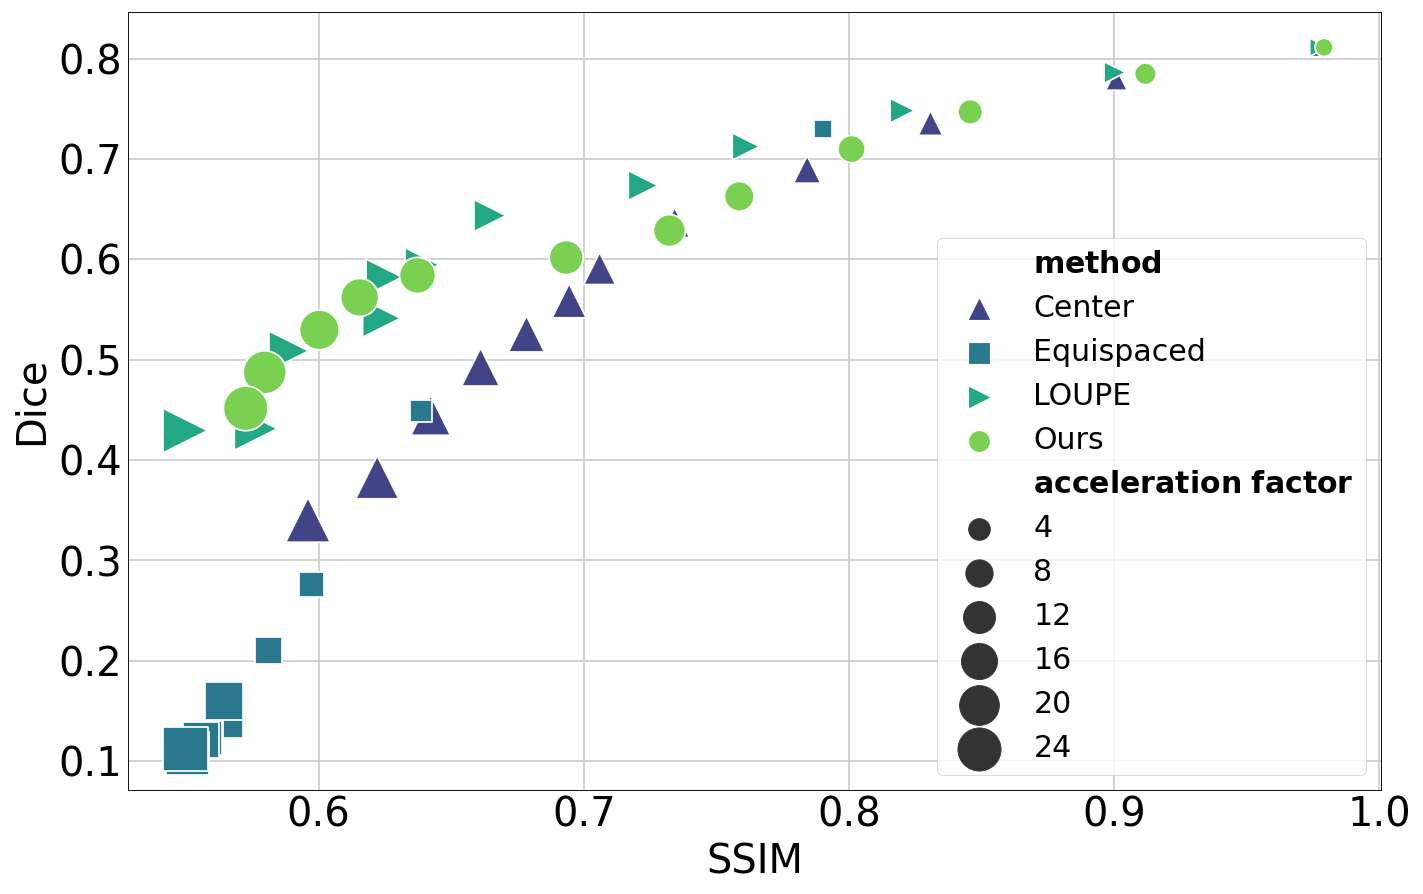

In [10]:
plt.figure(figsize=(12, 8), dpi=120)
# sns.lineplot(
#     data=df.groupby([r'$\bf{method}$', r'$\bf{acceleration}$']).mean(), size=0.1,
#     x='SSIM', y='Dice', hue=r'$\bf{method}$', legend=False, palette='viridis', alpha=0.2)
sns.scatterplot(
    data=df.groupby([r'$\bf{method}$', r'$\bf{acceleration}$']).mean(),
    markers=['^', 's', '>', 'o'],
    style=r'$\bf{method}$',
    x='SSIM', y='Dice', hue=r'$\bf{method}$', size=r'$\bf{acceleration}$', sizes=(30 * 4,180 * 4), palette='viridis')
plt.xlabel('SSIM', fontdict=dict(size=24))
plt.ylabel('Dice', fontdict=dict(size=24))
plt.tick_params(axis='both', labelsize=24)
legend = plt.legend(loc=4, prop={'size': 18})
legend.get_texts()[5].set_text(r'$\bf{acceleration}$ $\bf{factor}$')
legend.legendHandles[1].set_sizes([36*4])
legend.legendHandles[2].set_sizes([36*4])
legend.legendHandles[3].set_sizes([36*4])
legend.legendHandles[4].set_sizes([36*4])
plt.savefig('/tmp/plot.eps', bbox_inches = "tight")
plt.show()